# SkillFactory
## Введение в ML, введение в sklearn

В этом задании мы с вами рассмотрим данные с конкурса [Задача предсказания отклика клиентов ОТП Банка](http://www.machinelearning.ru/wiki/index.php?title=%D0%97%D0%B0%D0%B4%D0%B0%D1%87%D0%B0_%D0%BF%D1%80%D0%B5%D0%B4%D1%81%D0%BA%D0%B0%D0%B7%D0%B0%D0%BD%D0%B8%D1%8F_%D0%BE%D1%82%D0%BA%D0%BB%D0%B8%D0%BA%D0%B0_%D0%BA%D0%BB%D0%B8%D0%B5%D0%BD%D1%82%D0%BE%D0%B2_%D0%9E%D0%A2%D0%9F_%D0%91%D0%B0%D0%BD%D0%BA%D0%B0_%28%D0%BA%D0%BE%D0%BD%D0%BA%D1%83%D1%80%D1%81%29)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12,5)

### Грузим данные

Считаем описание данных

In [3]:

df_descr = pd.read_csv('data/otp_description.csv', sep='\t', encoding='utf8')

In [4]:
df_descr

,ПОЛЕ,ОПИСАНИЕ
0,AGREEMENT_RK,уникальный идентификатор объекта в выборке
1,AGE,возраст клиента
2,SOCSTATUS_WORK_FL,социальный статус клиента относительно работы ...
3,SOCSTATUS_PENS_FL,социальный статус клиента относительно пенсии ...
4,GENDER,"пол клиента (1- женщины, 0-мужчины)"
5,CHILD_TOTAL,количество детей клиента
6,DEPENDANTS,количество иждивенцев клиента
7,EDUCATION,образование
8,MARITAL_STATUS,семейное положение
9,GEN_INDUSTRY,отрасль работы клиента


Считаем обучающую выборки и тестовую (которую мы как бы не видим)

In [5]:
df_train = pd.read_csv('data/otp_train.csv', sep='\t', encoding='utf8')

In [6]:
df_train.shape

(15223, 52)

In [7]:
df_test = pd.read_csv('data/otp_test.csv', sep='\t', encoding='utf8')

In [8]:
df_test.shape

(14910, 52)

In [9]:
df_train.head()

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59910150,0,49,1,0,1,2,1,Среднее специальное,Состою в браке,...,0,1,1,1,6,2,1,1580,1580,NaN
1,59910230,0,32,1,0,1,3,3,Среднее,Состою в браке,...,0,1,1,1,6,1,1,4020,4020,NaN
2,59910525,0,52,1,0,1,4,0,Неполное среднее,Состою в браке,...,0,1,2,1,11,0,0,0,0,NaN
3,59910803,0,39,1,0,1,1,1,Высшее,Состою в браке,...,1,1,1,1,6,3,1,"1589,92333333333",1590,NaN
4,59911781,0,30,1,0,0,0,0,Среднее,Состою в браке,...,0,1,2,1,16,2,1,"1152,15",2230,NaN


## Объединим две выборки

Так как пока мы пока не умеем работать sklearn  Pipeline, то для того, чтобы после предобработки столбцы в двух выборках находились на своих местах.

Для того, чтобы в дальнейшем отделить их введем новый столбец "sample"

In [10]:
df_train.loc[:, 'sample'] = 'train'
df_test.loc[:, 'sample'] = 'test'

In [11]:
df = df_test.append(df_train).reset_index(drop=True)

In [12]:
df.shape
df.head(10)

,AGREEMENT_RK,TARGET,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,...,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED,sample
0,59909969,0,30,1,0,1,1,1,Среднее специальное,Не состоял в браке,...,1,2,2,8,0,0,0,0,NaN,test
1,59910420,0,48,0,1,1,0,0,Среднее,Состою в браке,...,0,2,1,15,0,0,0,0,NaN,test
2,59911223,0,35,1,0,0,1,0,Среднее,Не состоял в браке,...,1,1,1,1,0,0,0,0,NaN,test
3,59911322,0,22,1,0,0,0,0,Среднее,Не состоял в браке,...,1,3,2,9,0,0,0,0,NaN,test
4,59911438,0,27,1,0,1,2,2,Высшее,Состою в браке,...,1,1,1,5,0,0,0,0,NaN,test
5,59911769,0,44,0,1,0,2,2,Среднее специальное,Состою в браке,...,0,1,1,5,0,0,0,0,NaN,test
6,59912044,0,57,1,0,1,0,0,Среднее,Не состоял в браке,...,1,3,3,14,0,0,0,0,NaN,test
7,59912382,0,33,1,0,1,2,2,Среднее специальное,Разведен(а),...,1,1,1,5,0,0,0,0,NaN,test
8,59912422,0,53,0,1,1,2,0,Среднее специальное,Состою в браке,...,0,1,1,4,0,0,0,0,NaN,test
9,59912485,1,33,1,0,0,1,0,Неполное среднее,Состою в браке,...,1,1,1,6,0,0,0,0,NaN,test


### Чуть-чуть посмотрим на данные

Посмотрим типы данных и их заполняемость

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 53 columns):
AGREEMENT_RK                  30133 non-null int64
TARGET                        30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PRO

Видим, что часть данных - object, скорее всего стоки.


Давайте выведем эти значения для каждого столбца

In [ ]:
for i in df_train.columns: # перебираем все столбцы
    if str(df_train[i].dtype) == 'object': # если тип столбца - object
        #print('='*10)
        #print(i) # выводим название столбца
        #print(set(df_train[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        #print('\n') # выводим пустую строку

Mожно заметить что некоторые переменные, которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа, но по какой-то причине были распознаны как строки

Причина же что использовалась запятая для разделения не целой части числа..

Перекодировать их можно например так:

In [14]:
df['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float');

Такой эффект наблюдается в столбцах `PERSONAL_INCOME`, `CREDIT`, `FST_PAYMENT`, `LOAN_AVG_DLQ_AMT`, `LOAN_MAX_DLQ_AMT`

### Теперь ваше небольшое исследование

#### Задание 1. Есть ли пропуски в данных? Что с ними сделать?

(единственного верного ответа нет - аргументируйте)

In [89]:
# В данных имеются пропуски как для категориальных признаков, так и для числовых.

In [15]:
# Рассмотрим пропуски в числовых данных.

# Пропуски в колонке PREVIOUS_CARD_NUM_UTILIZED. Заменим все NaN на 0.0, поскольку имеется ввиду,
# что до этого у человека нет карты.
df['PREVIOUS_CARD_NUM_UTILIZED'].fillna( 0.0 );

# Пропуски в колонке WORK_TIME. Можно заменить все NaN на 0.0, что означало бы, что человек работает меньше месяца.
# А можно заменить на знaчение медианы, что и будет использовано здесь.

df['WORK_TIME'].fillna( 0.0 );
median = df[df['sample']=='train']['WORK_TIME'].median()
df['WORK_TIME'].fillna( median );

In [403]:
# Рассмотрим пропуски в категориальных признаках.

# Пропуски в колонке REGION_NM можно заменить на значения, посмотрев в каком регионе расположено REG_ADDRESS_PROVINCE 
# или FACT_ADDRESS_PROVINCE, так как они совпадают.
region_nm = df[df['REG_ADDRESS_PROVINCE']=='Новосибирская область']['REGION_NM']
df['REGION_NM'].fillna(region_nm)

# Пропуски в колонке 'JOB_DIR' можно заменить на самое часто встречаемое значение
# так как 'Участие в основ. деятельности' встречается гораздо чаще, чем все остальные.
df['JOB_DIR'].fillna( df['JOB_DIR'].value_counts().index[0] )

# Аналогичная ситуация с ORG_TP_FCAPITAL.
df['ORG_TP_FCAPITAL'].fillna( df['ORG_TP_FCAPITAL'].value_counts().index[0] )

# Кроме того, колонки в которых пропуски можно просто удалить
df.drop(columns='columns here')

# В колонке TP_PROVINCE пропуски можно заполнить значениями FACT_ADDRESS_PROVINCE
df['TP_PROVINCE'].fillna( df['FACT_ADDRESS_PROVINCE'] );

#### Задание 2. Есть ли категориальные признаки? Что с ними делать?

In [405]:
def family_income_mapper( input_str, min_val=0.0, max_val=50000.0 ):
    
    min_tag = 'до'
    max_tag = 'свыше'
    
    digits = [float(s) for s in input_str.split() if s.isdigit()]
    
    if len( digits ) == 2:
        
        return ( digits[0] + digits[1] )/2.0

    elif min_tag in input_str:
    
        return ( min_val + digits[0] )/2.0
    
    elif max_tag in input_str:
        
        return ( digits[0] + max_val )/2.0

In [406]:
# В данных имеются категориальные признаки.

# Рассмотрим категориальный признак MARITAL_STATUS. Применим функцию map к pd.Series c dict marital_status
marital_status = { 'Не состоял в браке': 0,\
                   'Разведен(а)': 0,\
                   'Вдовец/Вдова': 0,\
                   'Состою в браке': 1,\
                   'Гражданский брак':1 }
#print(df['MARITAL_STATUS'].map(marital_status))
df['MARITAL_STATUS'].map( marital_status )

# Рассмотрим категориальный признак ORG_TP_FCAPITAL. Применим функцию map к pd.Series c dict org_tp_fcapital
org_tp_fcapital = {'Без участия': 0,
                   'С участием': 1}

df['ORG_TP_FCAPITAL'].map(org_tp_fcapital)

# Рассмотрим категориальный признак FAMILY_INCOME. Сопоставим категориальному признаку число: середину интервала от ... до,
# результат не очень становится.
# Поэтому можно закодировать, как и любой категориальный признак с помощью OneHotEncoding.
df['FAMILY_INCOME'].map( lambda x: family_income_mapper(x) )
pd.get_dummies(df, columns=['FAMILY_INCOME'])

# Любой категориальный признак можно закодировать с с помощью OneHotEncoding
pd.get_dummies(df, columns=['columns here']);

# Кроме того, можно применить "умное кодирование" и сопоставить категориальному признаку какое-либо число.

#### Задание 3. Фунция предобработки

Напишите функцию, которая бы

* Удаляло идентификатор `AGREEMENT_RK`
* Избавлялась от проблем с '.' и ',' в стобцах PERSONAL_INCOME, CREDIT, FST_PAYMENT, LOAN_AVG_DLQ_AMT, LOAN_MAX_DLQ_AMT
* Что-то делала с пропусками
* Кодировала категориальные признаки

В результате, ваш датафрейм должен содержать только числа и не содержать пропусков!

In [384]:
def preproc_data(df_input):

    df_output = df_input.copy()

    df_output = df_output.drop( ['AGREEMENT_RK', 'DL_DOCUMENT_FL'], axis=1 )

    columns = [ 'PERSONAL_INCOME', 'CREDIT', 'FST_PAYMENT', 'LOAN_AVG_DLQ_AMT', 'LOAN_MAX_DLQ_AMT' ]
    for col in columns:
        
        df_output[ col ] = df_output[ col ].map(lambda x: x.replace(',', '.')).astype('float')
        
    # Заполняем пропуски.
    
    df_output['PREVIOUS_CARD_NUM_UTILIZED'] = df_output['PREVIOUS_CARD_NUM_UTILIZED'].fillna( 0.0 )
    
    median_work_time = df_output[df_output['sample']=='train']['WORK_TIME'].median()
    df_output['WORK_TIME'] = df_output['WORK_TIME'].fillna( median_work_time )
    
    region_nm = df_output[df_output['REG_ADDRESS_PROVINCE']=='Новосибирская область']['REGION_NM']
    df_output['REGION_NM'].fillna(region_nm)
    
    df_output['JOB_DIR'] = df_output['JOB_DIR'].fillna( df_output['JOB_DIR'].value_counts().index[0] )
    
    df_output['TP_PROVINCE'] = df_output['TP_PROVINCE'].fillna( df_output['FACT_ADDRESS_PROVINCE'] )

    # Перекодируем категориальные признаки.

    df_output['MARITAL_STATUS'] = df_output['MARITAL_STATUS'].map( marital_status )
    df_output = pd.get_dummies(df_output, columns=[ 'FAMILY_INCOME', 'EDUCATION','TP_PROVINCE' ])

    df_output = df_output.drop( [ 'ORG_TP_STATE', 'GEN_INDUSTRY', 'GEN_TITLE', \
                                  'ORG_TP_FCAPITAL', 'JOB_DIR', \
                                  'REG_ADDRESS_PROVINCE', 'FACT_ADDRESS_PROVINCE', \
                                  'POSTAL_ADDRESS_PROVINCE', 'REGION_NM' ], axis=1 )

    return df_output

In [386]:
df_preproc = df.pipe(preproc_data)
#df_preproc.info()
#df_preproc.head()

df_train_preproc = df_preproc.query('sample == "train"').drop(['sample'], axis=1)
df_test_preproc = df_preproc.query('sample == "test"').drop(['sample'], axis=1)

#### Задание 4. Отделите целевую переменную и остальные признаки

Должно получится:
* 2 матрицы: X и X_test
* 2 вектора: y и y_test

In [387]:
y = df_train_preproc['TARGET']
x = df_train_preproc.drop( ['TARGET'], axis=1 )

Y_test = df_test_preproc['TARGET']
X_test = df_test_preproc.drop( ['TARGET'], axis=1 )

#### Задание 5. Обучение и оценка качества разных моделей

In [388]:
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [389]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
# Постепенно мы узнаем, что они делают а сейчас учимся понимать какой работает качественнее
#     fit, 
#     predict, 
#     predict_proba

from sklearn.linear_model import LogisticRegression

# LogisticRegression

logistic_regression = LogisticRegression()
logistic_regression.fit( x_train, y_train )
predict_lr = logistic_regression.predict( x_test )
predict_proba_lr = logistic_regression.predict_proba( x_test )

C:\ProgramData\Anaconda2\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [390]:
from sklearn.tree import DecisionTreeClassifier

# DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
decision_tree.fit( x_train, y_train )
predict_dt = decision_tree.predict( x_test )
predict_proba_dt = decision_tree.predict_proba( x_test )

In [391]:
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit( x_train, y_train )
predict_rf = random_forest.predict( x_test )
predict_proba_rf = random_forest.predict_proba( x_test )

C:\ProgramData\Anaconda2\envs\py3\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [392]:
# Посчитать метрики стандартные
# accuracy, precision, recall

from sklearn.metrics import accuracy_score, precision_score, recall_score

# LogisticRegression

precision_lr = precision_score( y_test, predict_lr )
recall_lr = recall_score( y_test, predict_lr )
accuracy_lr = accuracy_score( y_test, predict_lr )

# DecisionTreeClassifier

precision_dt = precision_score( y_test, predict_dt )
recall_dt = recall_score( y_test, predict_dt )
accuracy_dt = accuracy_score( y_test, predict_dt )

# RandomForestClassifier

precision_rf = precision_score( y_test, predict_rf )
recall_rf = recall_score( y_test, predict_rf )
accuracy_rf = accuracy_score( y_test, predict_rf )

print( 'LogisticRegression:', precision_lr, recall_lr, accuracy_lr )
print( 'DecisionTreeClassifier:', precision_dt, recall_dt, accuracy_dt )
print( 'RandomForestClassifier:', precision_rf, recall_rf, accuracy_rf )

LogisticRegression: 0.3333333333333333 0.0036036036036036037 0.8780380994088023
DecisionTreeClassifier: 0.17281879194630873 0.18558558558558558 0.7930807970221152
RandomForestClassifier: 0.3684210526315789 0.012612612612612612 0.8773812130501423


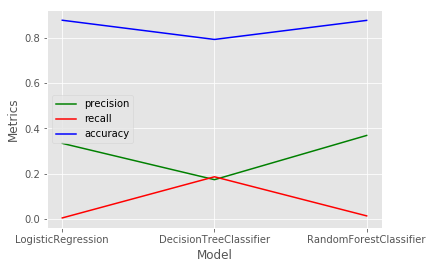

In [393]:
# Визуалищировать эти метрики всех моделей на одном графике (чтоб визуально сравнить)
# Возможно вас удивит качество! Но задача подобрана специально ;) Такое качество тоже бывает

plt.plot( [1., 2., 3.], [precision_lr, precision_dt, precision_rf],\
          label='precision', color='green' )
plt.plot( [1., 2., 3.], [recall_lr, recall_dt, recall_rf],\
          label='recall', color='red' )
plt.plot( [1., 2., 3.], [accuracy_lr, accuracy_dt, accuracy_rf],\
          label='accuracy', color='blue' )

plt.xticks( [1., 2., 3.], ( 'LogisticRegression', 'DecisionTreeClassifier', 'RandomForestClassifier' ) )
plt.legend()
plt.xlabel( 'Model' )
plt.ylabel( 'Metrics' )
plt.grid( True )

(-0.01, 1.01)

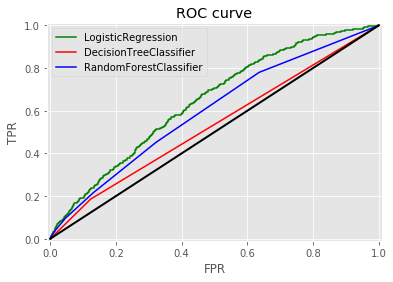

In [394]:
# Потроить roc-кривые всех можелей на одном графике
# Вывести roc_auc каждой моделе
# Подпишите оси и линии

from sklearn.metrics import roc_auc_score, roc_curve

# LogisticRegression

fpr_lr, tpr_lr, thresholds_lr = roc_curve( y_test, predict_proba_lr[:, 1] )
plt.plot( fpr_lr, tpr_lr, color='green', label='LogisticRegression' )

# DecisionTreeClassifier

fpr_dt, tpr_dt, thresholds_dt = roc_curve( y_test, predict_proba_dt[:, 1] )
plt.plot( fpr_dt, tpr_dt, color='red', label='DecisionTreeClassifier' ) 

# RandomForestClassifier

fpr_rf, tpr_rf, thresholds_rf = roc_curve( y_test, predict_proba_rf[:, 1] )
plt.plot( fpr_rf, tpr_rf, color='blue', label='RandomForestClassifier' )

plt.plot([0, 1], [0, 1], color='black', linewidth=2)
plt.legend()
plt.xlabel( 'FPR' )
plt.ylabel( 'TPR' )
plt.title('ROC curve')
plt.grid( True )
plt.xlim( (-0.01, 1.01) )
plt.ylim( (-0.01, 1.01) )

In [395]:
print( 'roc auc score LogisticRegression:', roc_auc_score( y_test, predict_proba_lr[:, 1] ) )
print( 'roc auc score DecisionTreeClassifier:', roc_auc_score( y_test, predict_proba_dt[:, 1] ) )
print( 'roc auc score RandomForestClassifier:', roc_auc_score( y_test, predict_proba_rf[:, 1] ) )

roc auc score LogisticRegression: 0.6437426459360657
roc auc score DecisionTreeClassifier: 0.5313521148266911
roc auc score RandomForestClassifier: 0.596850439671975


In [396]:
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
from sklearn.model_selection import cross_val_score, cross_val_predict

# LogisticRegression
cross_val_score_lr = cross_val_score( LogisticRegression(), x, y, scoring='roc_auc', cv=10 );

# DecisionTreeClassifier

cross_val_score_dt = cross_val_score( DecisionTreeClassifier(), x, y, scoring='roc_auc', cv=10 );

# RandomForestClassifier

cross_val_score_rf = cross_val_score( RandomForestClassifier(), x, y, scoring='roc_auc', cv=10 );

C:\ProgramData\Anaconda2\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda2\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda2\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda2\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda2\envs\py3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to '

In [397]:
print( 'Mean roc auc score LogisticRegression:', cross_val_score_lr.mean() )
print( 'Mean roc auc score DecisionTreeClassifier:', cross_val_score_dt.mean() )
print( 'Mean roc auc score RandomForestClassifier:', cross_val_score_rf.mean() )

Mean roc auc score LogisticRegression: 0.6426363149868555
Mean roc auc score DecisionTreeClassifier: 0.5295937257253803
Mean roc auc score RandomForestClassifier: 0.6006190540657027


In [398]:
# Взять лучшую модель и сделать предсказания (с вероятностями (!!!)) для test выборки

# Поскольку метрикой в данной задаче является ROC AUC, следовательно лучшее предсказание дает модель LogisticRegression.

predict = logistic_regression.predict( X_test )
predict_proba = logistic_regression.predict_proba( X_test )

roc auc score LogisticRegression: 0.6243327833260963


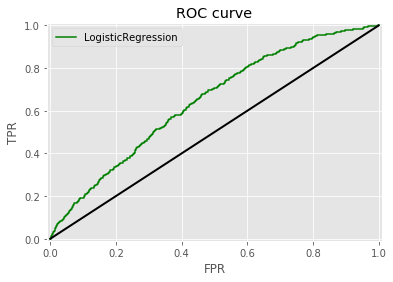

In [399]:
# Померить roc_auc на тесте
# Вывести текстом и на графике =)

fpr, tpr, thresholds = roc_curve( Y_test, predict_proba[:, 1] )
plt.plot( fpr_lr, tpr_lr, color='green', label='LogisticRegression' )

plt.plot([0, 1], [0, 1], color='black', linewidth=2)
plt.legend()
plt.xlabel( 'FPR' )
plt.ylabel( 'TPR' )
plt.title('ROC curve')
plt.grid( True )
plt.xlim( (-0.01, 1.01) )
plt.ylim( (-0.01, 1.01) )

print( 'roc auc score LogisticRegression:', roc_auc_score( Y_test, predict_proba[:, 1] ) )

### Больше обязательных заданий нет, но ниже вы можете провести исследование, поиграться с данными
### Это возможность написать код, который я посмотрю и в случае чего откомметирую. ;)
### Это не оценивается и остается на ваше усмотрение. Просто дополнительная возможность

In [400]:
### И далее ;)